In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def predict_price(x_val, w_val, b_val):
    f_wb = w_val* x_val + b_val
    return f_wb

In [32]:
def compute_cost(x_data, y_data, w_val, b_val):
    m = x_data.shape[0]
    cost_sum = 0
    for i in range(m):
        f_wb = predict_price(x_data[i], w_val, b_val)
        cost = (f_wb - y_data[i]) ** 2
        cost_sum += cost
    total_cost = (1 / (2 * m)) * cost_sum
    return total_cost

In [33]:
def compute_gradient(x_data, y_data, w_val, b_val):
    m = x_data.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = predict_price(x_data[i], w_val, b_val)
        dj_dw_i = (f_wb - y_data[i]) * x_data[i]
        dj_db_i = f_wb - y_data[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

In [34]:
def gradient_descent(x_data, y_data, w_in, b_in, alpha, num_iters, cost_fn, gradient_fn):
    j_history = []
    b = b_in
    w = w_in
    for i in range(num_iters):
        dj_dw, dj_db = gradient_fn(x_data, y_data, w, b)
        b = b - alpha * dj_db
        w = w - alpha * dj_dw
        if i<100000: # To ensure ram is not filled up
            j_history.append(cost_fn(x_data, y_data, w, b))
    return w, b, j_history

In [35]:
def plot_cost_with_iterations(j_history):
    fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
    ax1.plot(j_history[:100])
    ax2.plot(1000 + np.arange(len(j_history[1000:])), j_history[1000:])
    ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
    ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
    ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
    plt.show()

In [36]:
def train(x_train, y_train):
    # parameters
    w_init = 0
    b_init = 0
    iterations = 10000
    tmp_alpha = 1.0e-2

    w_final, b_final, j_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
    plot_cost_with_iterations(j_hist)
    return w_final, b_final

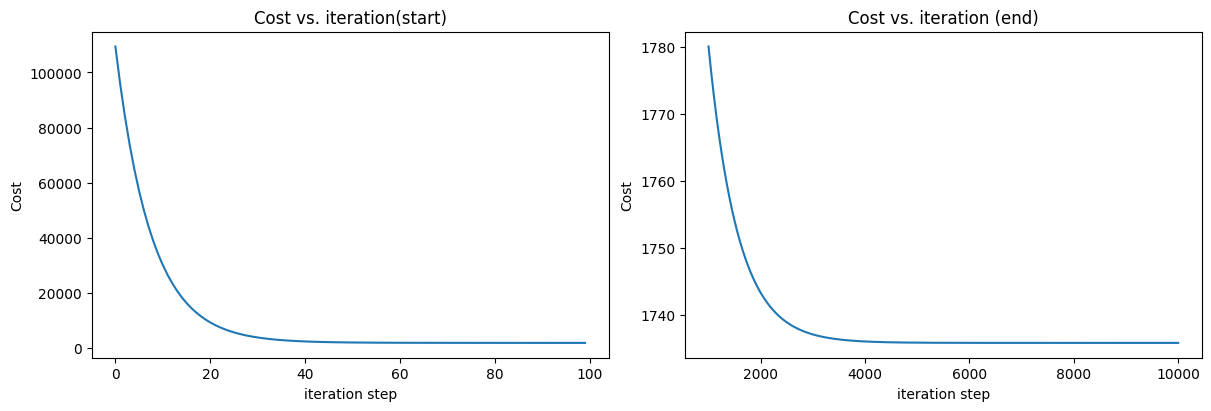

In [37]:
x_train_data = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train_data = np.array([250, 300, 480, 430, 630, 730])
w, b = train(x_train_data, y_train_data)

In [38]:
if __name__ == "__main__":
    x = int(input("Enter x_val: "))
    y = predict_price(x, w, b)
    print("Predicted price: ", y)

Predicted price:  630.5093967286989
